# Proyek Analisis Performa Belajar Siswa
Tujuan dari proyek ini adalah untuk membuat sebuah model yang dapat mengidentifikasi pola belajar siswa dan menyajikan insight mengenai performa siswa. Proyek ini menggunakan dataset sintesis mandiri, yang telah diberikan izin oleh Admin dari Capstone Project.

---

Proyek ini mengkategorikan pola belajar siswa dengan karakteristik:

- **Consistent Learner** adalah tipe pembelajar yang menjaga ritme belajar secara stabil dan rutin. Mereka biasanya belajar dengan frekuensi tinggi, durasi moderat, serta melakukan pengulangan materi secara konsisten sehingga hasil kuis mereka cenderung stabil.  Siswa dengan tipe ini memiliki kecepatan belajar yang sedang, tidak terlalu cepat maupun lambat, sehingga pola belajar ini cocok untuk pembelajaran jangka panjang.

- **Fast Learner** merupakan pembelajar yang cepat memahami materi dengan durasi belajar singkat dan jarang melakukan pengulangan. Mereka unggul dalam kecepatan menyelesaikan tugas maupun kuis, dengan nilai yang umumnya tinggi meski proses belajarnya lebih efisien.  Pola belajar ini mungkin kurang mendalami materi secara reflektif.

- **Reflective Learner** adalah pembelajar yang teliti dan mendalam, cenderung menghabiskan waktu lebih lama untuk belajar serta sering mengulang materi. Mereka biasanya memiliki durasi submission panjang dan waktu pengerjaan kuis lebih lama, namun hasil kuis tetap tinggi karena pemahaman yang kuat.  Pola belajar ini cocok untuk bidang yang menuntut analisis mendalam.

- **Balanced Learner** menyeimbangkan kecepatan dan kedalaman belajar. Mereka memiliki frekuensi, durasi, dan pengulangan yang moderat, serta nilai kuis yang stabil. Karakteristik ini membuat mereka fleksibel dan mampu beradaptasi dengan berbagai situasi belajar.  Pola belajar ini cocok untuk pembelajaran umum yang membutuhkan fleksibilitas.

# Import Library

In [ ]:
import pandas as pd
import numpy as np
from joblib import dump
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Membuat dataset sintesis

Dataset sintetis 2000 sampel dengan 4 label target bisa dibuat menggunakan aturan generatif khusus per label. Setiap label memiliki pola fitur yang berbeda (Consistent, Fast, Reflective, Balanced Learner), distribusi kelas seimbang (500 sampel per label)

---

## Aturan Generatif Per Label (ringkas)

- **Consistent Learner**  
  - Materi: 3–5  
  - Kecepatan: ~1.0 materi/jam  
  - Frekuensi: 5–7 hari/minggu  
  - Durasi belajar: 60–120 menit  
  - Pengulangan: 2–3 kali/minggu  
  - Durasi Submission: 240–360 menit  
  - Rating Submission: 1–3  
  - Nilai kuis: 75–85%  
  - Waktu kuis: 15–20 menit  

- **Fast Learner**  
  - Materi: ≥6  
  - Kecepatan: 1.5–2.0 materi/jam  
  - Frekuensi: 3–5 hari/minggu  
  - Durasi belajar: 60–90 menit  
  - Pengulangan: 0–1 kali/minggu  
  - Durasi Submission: 120–240 menit  
  - Rating Submission: 2–4  
  - Nilai kuis: 85–95%  
  - Waktu kuis: 5–10 menit  

- **Reflective Learner**  
  - Materi: 2–4  
  - Kecepatan: 0.5–1.0 materi/jam  
  - Frekuensi: 3–4 hari/minggu  
  - Durasi belajar: 180–240 menit  
  - Pengulangan: ≥4 kali/minggu  
  - Durasi Submission: 360–600 menit  
  - Rating Submission: 2–4  
  - Nilai kuis: 80–95%  
  - Waktu kuis: 20–25 menit  

- **Balanced Learner**  
  - Materi: 4–6  
  - Kecepatan: 1.0–1.5 materi/jam  
  - Frekuensi: 4–5 hari/minggu  
  - Durasi belajar: 120–180 menit  
  - Pengulangan: 2–3 kali/minggu  
  - Durasi Submission: 240–360 menit  
  - Rating Submission: 1–3  
  - Nilai kuis: 80–90%  
  - Waktu kuis: 10–15 menit  

In [ ]:
n_samples = 2000
labels = ["Consistent Learner", "Fast Learner", "Reflective Learner", "Balanced Learner"]
samples_per_class = n_samples // len(labels)

rng = np.random.default_rng(seed=42)

def generate_samples(label, n):
    if label == "Consistent Learner":
        return pd.DataFrame({
            "jumlah_materi_diselesaikan": rng.integers(3,6,n),
            "kecepatan_menyelesaikan_materi": rng.choice([1.0],n),
            "frekuensi_belajar_mingguan": rng.integers(5,8,n),
            "durasi_belajar": rng.integers(60,121,n),
            "pengulangan_materi": rng.integers(2,4,n),
            "durasi_submission": rng.integers(240,361,n),
            "rating_submission": rng.integers(1,4,n),
            "nilai_kuis": rng.integers(75,86,n),
            "waktu_pengerjaan_kuis": rng.integers(15,21,n),
            "Label": [label]*n
        })
    if label == "Fast Learner":
        return pd.DataFrame({
            "jumlah_materi_diselesaikan": rng.integers(6,9,n),
            "kecepatan_menyelesaikan_materi": rng.choice([1.5,2.0],n),
            "frekuensi_belajar_mingguan": rng.integers(3,6,n),
            "durasi_belajar": rng.integers(60,91,n),
            "pengulangan_materi": rng.integers(0,2,n),
            "durasi_submission": rng.integers(120,241,n),
            "rating_submission": rng.integers(2,5,n),
            "nilai_kuis": rng.integers(85,96,n),
            "waktu_pengerjaan_kuis": rng.integers(5,11,n),
            "Label": [label]*n
        })
    if label == "Reflective Learner":
        return pd.DataFrame({
            "jumlah_materi_diselesaikan": rng.integers(2,5,n),
            "kecepatan_menyelesaikan_materi": rng.choice([0.5,1.0],n),
            "frekuensi_belajar_mingguan": rng.integers(3,5,n),
            "durasi_belajar": rng.integers(180,241,n),
            "pengulangan_materi": rng.integers(4,7,n),
            "durasi_submission": rng.integers(360,601,n),
            "rating_submission": rng.integers(2,5,n),
            "nilai_kuis": rng.integers(80,96,n),
            "waktu_pengerjaan_kuis": rng.integers(20,26,n),
            "Label": [label]*n
        })
    if label == "Balanced Learner":
        return pd.DataFrame({
            "jumlah_materi_diselesaikan": rng.integers(4,7,n),
            "kecepatan_menyelesaikan_materi": rng.choice([1.0,1.5],n),
            "frekuensi_belajar_mingguan": rng.integers(4,6,n),
            "durasi_belajar": rng.integers(120,181,n),
            "pengulangan_materi": rng.integers(2,4,n),
            "durasi_submission": rng.integers(240,361,n),
            "rating_submission": rng.integers(1,4,n),
            "nilai_kuis": rng.integers(80,91,n),
            "waktu_pengerjaan_kuis": rng.integers(10,16,n),
            "Label": [label]*n
        })

# Gabungkan semua kelas
df = pd.concat([generate_samples(label, samples_per_class) for label in labels], ignore_index=True)

# Hilangkan duplikasi jika ada
df = df.drop_duplicates()

# Jika kurang dari 2000 baris, tambahkan lagi
while len(df) < n_samples:
    label = rng.choice(labels)
    new_row = generate_samples(label,1)
    if not ((df.drop(columns="Label") == new_row.drop(columns="Label").iloc[0]).all(axis=1)).any():
        df = pd.concat([df,new_row], ignore_index=True)

# Simpan ke CSV
df.to_csv("dataset_sintetis.csv", index=False)

# Ringkasan distribusi
print(df["Label"].value_counts())
for col in df.columns[:-1]:
    print(col, df[col].describe())

Label
Consistent Learner    500
Fast Learner          500
Reflective Learner    500
Balanced Learner      500
Name: count, dtype: int64
jumlah_materi_diselesaikan count    2000.000000
mean        4.722000
std         1.665564
min         2.000000
25%         4.000000
50%         4.000000
75%         6.000000
max         8.000000
Name: jumlah_materi_diselesaikan, dtype: float64
kecepatan_menyelesaikan_materi count    2000.000000
mean        1.190500
std         0.433652
min         0.500000
25%         1.000000
50%         1.000000
75%         1.500000
max         2.000000
Name: kecepatan_menyelesaikan_materi, dtype: float64
frekuensi_belajar_mingguan count    2000.000000
mean        4.506000
std         1.154396
min         3.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: frekuensi_belajar_mingguan, dtype: float64
durasi_belajar count    2000.000000
mean      131.026000
std        55.409904
min        60.000000
25%        80.000000
50% 

In [ ]:
df = pd.read_csv("dataset_sintetis.csv")

print(df.head())

   jumlah_materi_diselesaikan  kecepatan_menyelesaikan_materi  \
0                           3                             1.0   
1                           5                             1.0   
2                           4                             1.0   
3                           4                             1.0   
4                           4                             1.0   

   frekuensi_belajar_mingguan  durasi_belajar  pengulangan_materi  \
0                           5             109                   3   
1                           6             104                   2   
2                           7              94                   2   
3                           7             114                   2   
4                           5              67                   3   

   durasi_submission  rating_submission  nilai_kuis  waktu_pengerjaan_kuis  \
0                346                  3          83                     15   
1                247                  

# Preprocessing data

## Encoding Label dan Normalisasi Fitur Numerik

In [ ]:
# 1. Encoding label
le = LabelEncoder()
df["Label"] = le.fit_transform(df["Label"])

# 2. Normalisasi fitur numerik
scaler = MinMaxScaler()

features_to_normalize = ["durasi_belajar", "durasi_submission", "waktu_pengerjaan_kuis"]
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

print(df.head())

   jumlah_materi_diselesaikan  kecepatan_menyelesaikan_materi  \
0                           3                             1.0   
1                           5                             1.0   
2                           4                             1.0   
3                           4                             1.0   
4                           4                             1.0   

   frekuensi_belajar_mingguan  durasi_belajar  pengulangan_materi  \
0                           5        0.272222                   3   
1                           6        0.244444                   2   
2                           7        0.188889                   2   
3                           7        0.300000                   2   
4                           5        0.038889                   3   

   durasi_submission  rating_submission  nilai_kuis  waktu_pengerjaan_kuis  \
0           0.470833                  3          83                   0.50   
1           0.264583                  

In [ ]:
# Menampilkan mapping label -> angka
for label, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{label} -> {encoded}")

Balanced Learner -> 0
Consistent Learner -> 1
Fast Learner -> 2
Reflective Learner -> 3


## Mengacak urutas baris dataset

In [ ]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_shuffled.head())

   jumlah_materi_diselesaikan  kecepatan_menyelesaikan_materi  \
0                           5                             1.5   
1                           4                             1.0   
2                           3                             1.0   
3                           8                             2.0   
4                           3                             0.5   

   frekuensi_belajar_mingguan  durasi_belajar  pengulangan_materi  \
0                           4        0.644444                   2   
1                           5        0.305556                   2   
2                           4        0.788889                   4   
3                           4        0.022222                   1   
4                           4        0.777778                   5   

   durasi_submission  rating_submission  nilai_kuis  waktu_pengerjaan_kuis  \
0           0.450000                  3          81                   0.30   
1           0.366667                  

## Data Splitting

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df_shuffled.drop("Label", axis=1)
y = df_shuffled["Label"]

# Lakukan splitting: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cek ukuran hasil split
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 1600
Jumlah data uji: 400


## TRAIN DAN TEST MODEL

In [ ]:
# CELL 2: CEK DATASET SETELAH PREPROCESSING

print("Ukuran dataset:", df_shuffled.shape)
print("\n5 baris pertama dataset:")
print(df_shuffled.head())

print("\nDistribusi label (angka):")
print(df_shuffled["Label"].value_counts())

print("\nMapping label asli -> angka:")
for kelas, idx in zip(le.classes_, range(len(le.classes_))):
    print(f"{kelas:20s} -> {idx}")


Ukuran dataset: (2000, 10)

5 baris pertama dataset:
   jumlah_materi_diselesaikan  kecepatan_menyelesaikan_materi  \
0                           5                             1.5   
1                           4                             1.0   
2                           3                             1.0   
3                           8                             2.0   
4                           3                             0.5   

   frekuensi_belajar_mingguan  durasi_belajar  pengulangan_materi  \
0                           4        0.644444                   2   
1                           5        0.305556                   2   
2                           4        0.788889                   4   
3                           4        0.022222                   1   
4                           4        0.777778                   5   

   durasi_submission  rating_submission  nilai_kuis  waktu_pengerjaan_kuis  \
0           0.450000                  3          81            

In [ ]:
# CELL 4: DEFINISIKAN MODEL KLASIFIKASI MULTI-CLASS

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7)
}

print("Model yang akan dilatih:")
for m in models:
    print("-", m)


Model yang akan dilatih:
- Logistic Regression
- Random Forest
- SVM (RBF Kernel)
- KNN (k=7)


In [ ]:
# CELL 5: TRAIN & TEST SETIAP MODEL

accuracy_results = {}

for model_name, model in models.items():
    print("\n====================================")
    print(f"Training model: {model_name}")
    print("====================================")

    # Training
    model.fit(X_train, y_train)

    # Testing
    y_pred = model.predict(X_test)

    # Akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = acc

    print(f"Akurasi: {acc:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))



Training model: Logistic Regression
Akurasi: 0.9975

Classification Report:
                    precision    recall  f1-score   support

  Balanced Learner       0.99      1.00      1.00       100
Consistent Learner       1.00      0.99      0.99       100
      Fast Learner       1.00      1.00      1.00       100
Reflective Learner       1.00      1.00      1.00       100

          accuracy                           1.00       400
         macro avg       1.00      1.00      1.00       400
      weighted avg       1.00      1.00      1.00       400


Training model: Random Forest
Akurasi: 1.0000

Classification Report:
                    precision    recall  f1-score   support

  Balanced Learner       1.00      1.00      1.00       100
Consistent Learner       1.00      1.00      1.00       100
      Fast Learner       1.00      1.00      1.00       100
Reflective Learner       1.00      1.00      1.00       100

          accuracy                           1.00       400
       

RINGKASAN AKURASI SEMUA MODEL
Logistic Regression  : 0.9975
Random Forest        : 1.0000
SVM (RBF Kernel)     : 0.8650
KNN (k=7)            : 0.9700

Model terbaik adalah: Random Forest dengan akurasi 1.0000


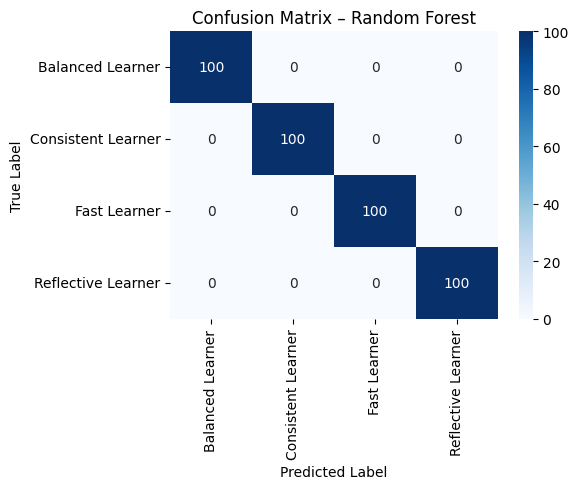

In [ ]:
# CELL 6: MODEL TERBAIK + CONFUSION MATRIX

# Cari model terbaik berdasarkan akurasi
best_model_name = max(accuracy_results, key=accuracy_results.get)
best_model = models[best_model_name]

print("====================================")
print("RINGKASAN AKURASI SEMUA MODEL")
print("====================================")
for name, acc in accuracy_results.items():
    print(f"{name:20s} : {acc:.4f}")

print(f"\nModel terbaik adalah: {best_model_name} dengan akurasi {accuracy_results[best_model_name]:.4f}")

# Confusion matrix untuk model terbaik
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    fmt="d",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix – {best_model_name}")
plt.tight_layout()
plt.show()


## MENAMPILKAN INSIGHT


In [ ]:
# CELL 1: STATISTIK DASAR UNTUK INSIGHT DINAMIS

import numpy as np

# kita pakai X_train supaya tidak mengintip data uji
feature_means = X_train.mean()
feature_q1 = X_train.quantile(0.25)
feature_q3 = X_train.quantile(0.75)

print("Rata-rata fitur utama:")
print(feature_means[["frekuensi_belajar_mingguan", "durasi_belajar", "nilai_kuis"]])


Rata-rata fitur utama:
frekuensi_belajar_mingguan     4.496875
durasi_belajar                 0.395962
nilai_kuis                    85.485000
dtype: float64


In [ ]:
# CELL 2: HELPER UNTUK POSISI NILAI & LEVEL PERFORMA

def posisi_nilai(nilai, q1, q3, mean):
    """
    Mengembalikan frasa:
    - 'lebih rendah dari rata-rata'
    - 'mendekati rata-rata'
    - 'lebih tinggi dari rata-rata'
    """
    if nilai < q1:
        return "lebih rendah dari rata-rata"
    elif nilai > q3:
        return "lebih tinggi dari rata-rata"
    else:
        return "mendekati rata-rata"


def level_nilai_kuis(nilai):
    """
    Mengembalikan level ('rendah', 'cukup', 'tinggi')
    + kalimat tambahan untuk highlight/rekomendasi.
    Batas bisa kamu sesuaikan dengan kebutuhan.
    """
    if nilai < 60:
        level = "rendah"
        komentar = (
            "Nilai kuismu masih berada di zona yang perlu banyak perbaikan. "
            "Ini sinyal penting untuk memperkuat pemahaman dasarmu."
        )
    elif nilai < 75:
        level = "cukup"
        komentar = (
            "Nilai kuismu berada di tingkat yang cukup, tetapi masih punya ruang besar untuk ditingkatkan."
        )
    else:
        level = "tinggi"
        komentar = (
            "Nilai kuismu sudah tergolong baik dan mencerminkan pemahaman yang solid."
        )
    return level, komentar


In [ ]:
insight_templates = {
    "Consistent Learner": {
        "kategori": "📈 Tim Biru – Consistent Learner",
        "badge": "📅 Steady Achiever",
        "base_highlight": (
            "Pola belajarmu konsisten dan mendukung pembelajaran jangka panjang."
        ),
        "base_rekomendasi": (
            "Pertahankan ritme ini, dan sesekali variasikan teknik belajar "
            "seperti diskusi, belajar kelompok, atau latihan soal terjadwal."
        ),
    },
    "Fast Learner": {
        "kategori": "⚡ Tim Kuning – Fast Learner",
        "badge": "⚡ Speed Runner",
        "base_highlight": (
            "Kamu cenderung cepat menangkap inti materi dengan waktu belajar yang relatif efisien."
        ),
        "base_rekomendasi": (
            "Cobalah menambahkan sesi review singkat atau membuat rangkuman, "
            "agar pemahamanmu tidak hanya cepat tetapi juga lebih dalam."
        ),
    },
    "Reflective Learner": {
        "kategori": "🌱 Tim Hijau – Reflective Learner",
        "badge": "🔍 Deep Thinker",
        "base_highlight": (
            "Pendekatan belajarmu yang mendalam sangat cocok untuk materi yang butuh analisis."
        ),
        "base_rekomendasi": (
            "Pertahankan kedalaman ini, namun sesuaikan durasi belajar agar tetap efisien saat menghadapi deadline."
        ),
    },
    "Balanced Learner": {
        "kategori": "🔮 Tim Ungu – Balanced Learner",
        "badge": "⚖ Balanced Achiever",
        "base_highlight": (
            "Kamu seimbang antara kecepatan dan kedalaman belajar, sehingga mudah beradaptasi."
        ),
        "base_rekomendasi": (
            "Pertahankan keseimbangan ini dan eksplor teknik belajar baru untuk menemukan kombinasi yang paling pas."
        ),
    },
}


In [ ]:
feature_columns = X_train.columns.tolist()
features_to_normalize = ["durasi_belajar", "durasi_submission", "waktu_pengerjaan_kuis"]

def prediksi_dan_insight_better(data_siswa: dict):
    df_new = pd.DataFrame([data_siswa])
    df_new = df_new[feature_columns]

    df_new[features_to_normalize] = scaler.transform(df_new[features_to_normalize])

    pred_encoded = best_model.predict(df_new)[0]
    pred_label = le.inverse_transform([pred_encoded])[0]

    durasi = data_siswa["durasi_belajar"]
    frekuensi = data_siswa["frekuensi_belajar_mingguan"]
    pengulangan = data_siswa["pengulangan_materi"]
    nilai_kuis = data_siswa["nilai_kuis"]

    pos_durasi = posisi_nilai(
        durasi,
        feature_q1["durasi_belajar"],
        feature_q3["durasi_belajar"],
        feature_means["durasi_belajar"],
    )
    pos_freq = posisi_nilai(
        frekuensi,
        feature_q1["frekuensi_belajar_mingguan"],
        feature_q3["frekuensi_belajar_mingguan"],
        feature_means["frekuensi_belajar_mingguan"],
    )
    pos_quiz = posisi_nilai(
        nilai_kuis,
        feature_q1["nilai_kuis"],
        feature_q3["nilai_kuis"],
        feature_means["nilai_kuis"],
    )

    level_quiz, komentar_quiz = level_nilai_kuis(nilai_kuis)

    tpl = insight_templates[pred_label]

    insight = (
        f"Dalam seminggu, kamu belajar sekitar {frekuensi} hari dengan durasi "
        f"±{durasi} menit per sesi, yang {pos_durasi} dibandingkan siswa lain. "
        f"Nilai kuismu sekitar {nilai_kuis} dan {pos_quiz} terhadap rata-rata. "
        f"{komentar_quiz}"
    )

    highlight = tpl["base_highlight"]
    rekomendasi = tpl["base_rekomendasi"]

    if level_quiz == "rendah":
        highlight = (
            "Pola belajarmu sudah terbentuk, tetapi hasil kuis masih perlu banyak ditingkatkan."
        )
        rekomendasi += (
            " Fokuskan lebih banyak waktu pada pemahaman konsep dasar, "
            "dan manfaatkan latihan soal atau rangkuman setelah belajar."
        )
    elif level_quiz == "cukup":
        rekomendasi += (
            " Kamu sudah berada di jalur yang benar, namun masih ada ruang besar "
            "untuk mendorong nilai ke level yang lebih tinggi."
        )
    else:
        highlight += (
            " Hasil kuismu yang tinggi menunjukkan bahwa strategi belajarmu sudah cukup efektif."
        )

    result = {
        "kode_label": int(pred_encoded),
        "nama_label": pred_label,
        "kategori": tpl["kategori"],
        "insight": insight,
        "highlight": highlight,
        "rekomendasi": rekomendasi,
        "badge": tpl["badge"],
    }

    return result


##TEST DENGAN DATA BARU


In [ ]:
siswa_1 = {
    "jumlah_materi_diselesaikan": 3,
    "kecepatan_menyelesaikan_materi": 1.8,
    "frekuensi_belajar_mingguan": 3,
    "durasi_belajar": 75,
    "pengulangan_materi": 1,
    "durasi_submission": 180,
    "rating_submission": 4,
    "nilai_kuis": 90,
    "waktu_pengerjaan_kuis": 8
}

siswa_2 = {
    "jumlah_materi_diselesaikan": 4,
    "kecepatan_menyelesaikan_materi": 1.0,
    "frekuensi_belajar_mingguan": 6,
    "durasi_belajar": 90,
    "pengulangan_materi": 3,
    "durasi_submission": 300,
    "rating_submission": 2,
    "nilai_kuis": 80,
    "waktu_pengerjaan_kuis": 18
}

hasil1 = prediksi_dan_insight_better(siswa_1)
print("Gaya Belajar")
print("Kategori    :", hasil1["kategori"])
print("Insight     :", hasil1["insight"])
print("Highlight   :", hasil1["highlight"])
print("Rekomendasi :", hasil1["rekomendasi"])
print("Badge       :", hasil1["badge"])

hasil2 = prediksi_dan_insight_better(siswa_2)
print("Gaya Belajar")
print("Kategori    :", hasil2["kategori"])
print("Insight     :", hasil2["insight"])
print("Highlight   :", hasil2["highlight"])
print("Rekomendasi :", hasil2["rekomendasi"])
print("Badge       :", hasil2["badge"])


Gaya Belajar
Kategori    : ⚡ Tim Kuning – Fast Learner
Insight     : Dalam seminggu, kamu belajar sekitar 3 hari dengan durasi ±75 menit per sesi, yang lebih tinggi dari rata-rata dibandingkan siswa lain. Nilai kuismu sekitar 90 dan lebih tinggi dari rata-rata terhadap rata-rata. Nilai kuismu sudah tergolong baik dan mencerminkan pemahaman yang solid.
Highlight   : Kamu cenderung cepat menangkap inti materi dengan waktu belajar yang relatif efisien. Hasil kuismu yang tinggi menunjukkan bahwa strategi belajarmu sudah cukup efektif.
Rekomendasi : Cobalah menambahkan sesi review singkat atau membuat rangkuman, agar pemahamanmu tidak hanya cepat tetapi juga lebih dalam.
Badge       : ⚡ Speed Runner
Gaya Belajar
Kategori    : 📈 Tim Biru – Consistent Learner
Insight     : Dalam seminggu, kamu belajar sekitar 6 hari dengan durasi ±90 menit per sesi, yang lebih tinggi dari rata-rata dibandingkan siswa lain. Nilai kuismu sekitar 80 dan lebih rendah dari rata-rata terhadap rata-rata. Nilai kuism

# **Save Model**

In [ ]:
dump(best_model, "model.joblib")

['model.joblib']

# **Input Test**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving model.joblib to model.joblib


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = ["Balanced Learner", "Consistent Learner", "Fast Learner", "Reflective Learner"]
encoder.fit(y)

LabelEncoder()